## Programming for Data Analysis - Project 1 ##

**Name: James McEneaney** <br/><br/>
**Course: Higher Diploma in Computing in Data Analytics, ATU Ireland** <br/><br/> 
**Semester: Semester 2 2023** <br/><br/>


***

### Introduction ###

This project sets out to simulate traffic levels between junctions 6 and 7 on the m50, based on an analysis of four weeks of traffic data taken during the month of October 2023. I will seek to establish how traffic levels are related to whether the day is a weekday or weekend, how traffic is distributed on average over a 24 hour period, and how the distribution of northbound traffic compares with that of southbound traffic. I also wish to investigate whether a relationship exists between local air temperature and the volume of traffic.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/M50_looking_north_at_Castleknock_flyover.jpg/3264px-M50_looking_north_at_Castleknock_flyover.jpg" alt="Junction 6 M50 Northbound" width="600" height="400">

To carry out this analysis, I have downloaded the monthly volume report for this traffic for October 2023 from the Transport Infrastructure Ireland 
site https://trafficdata.tii.ie/calendar_alt.asp?sgid=XZOA8M4LR27P0HAO3_SRSB&spid=130DE8EB2080. 

To investigate the relationship of local air temperature on traffic levels, I used hourly data for air temperature for the nearby Phoenix Park weather station, for the period 2nd October to 29th October inclusive. https://data.gov.ie/dataset/phoenix-park-hourly-data 

I manually compiled the data I wanted to use from both source files into a csv file which I saved into my repository for this project. I also saved the raw source data files into my repository for reference.

This project is of interest to me, as I currently travel on the m50 to work five days per month (southbound in the morning, northbound in the evening), and a better understanding of how traffic levels are distributed on the m50 could help me plan my commute better. I chose the area between junctions 6 and 7 as it strikes me as a busy area of the m50 during my commute. I am also curious to test what impact changes in a weather variable, such as air temperature, might have on other peoples' behavior with regard to deciding to drive.

I should caveat my findings by emphasising that the distributions of traffic I measured are taken from October 2023 only, and that the long run distributions for traffic levels are likely to deviate over time from those I measured (eg. due to holiday periods or events like very bad weather). Therefore, my simulated datasets for traffic levels are likely to deviate in the long run from the distributions that exist in the real world.

### Table of contents ###
* [Introduction](#introduction)
* [Background of dataset](#background-of-dataset)
* [Pre-analysis](#pre-analysis)
* [Summary of variables in dataset](#summary-of-variables-in-dataset)
* [Distribution of traffic data](#distribution-of-traffic-data)
    * [Southbound traffic over one day (Monday Week 1)](#southbound-traffic-over-one-day-(monday-week-1))
    * [Average hourly Southbound traffic over each Monday](#average-hourly-southbound-traffic-over-each-monday)
    * [Average hourly Northbound traffic over each Monday](#average-hourly-northbound-traffic-over-each-monday)
    * [Average hourly Southbound and Northbound traffic for other weekdays](#average-hourly-southbound-and-northbound-traffic-for-other-weekdays)
    * [Average hourly Southbound and Northbound traffic for weekends](#average-hourly-southbound-and-northbound-traffic-for-weekends)
    * [Average busiest times and traffic volumes by day and direction](#average-busiest-times-and-traffic-volumes-by-day-and-direction)
    * [Standard deviations of hourly traffic data](#standard-deviations-of-hourly-traffic-data)
    * [Summary of traffic distribution](#summary-of-traffic-distribution)
* [Distribution of Air Temperature data](#distribution-of-air-temperature-data)
    * [All temperature data](#all-temperature-data)
    * [Temperature variation over 24 hours - examples of individual days](#temperature-variation-over-24-hours-examples-of-individual-days)
    * [Average temperature for each hour over 4 week sample period](#average-temperature-for-each-hour-over-4-week-sample-period)
    * [Summary of Air Temperature data distribution](#summary-of-air-temperature-data-distribution)
    * [Standard deviations of hourly air temperature data](#standard-deviations-of-hourly-air-temperature-data)
* [Correlation and Regression analysis](#correlation-and-regression-analysis)
    * [Correlations between Southbound and Northbound traffic](#correlations-between-southbound-and-northbound-traffic)
    * [Correlations between traffic levels and Air Temperature](#correlations-between-traffic-levels-and-air-temperature)
    * [Regression equation](#regression-equation)
    * [Side-by-side comparison of distributions](#side-by-side-comparison-of-distributions)
* [Synthesising datasets](#synthesising-datasets)
* [Summary](#summary)
* [References](#references)

### Pre-analysis ###
Firstly, I will import libraries which I will use to complete the project:

In [207]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss 
from sklearn.linear_model import LinearRegression

Next, I will load up the dataset I will use for the project. This consists of real-world traffic and weather data amalgamated into a single CSV file:

In [208]:
df = pd.read_csv("J6_traffic_temp_hourly.csv")

# Here I am labelling the contents of the 'day' column as categorical variables (rather than object variables) 
# and ordering the contents from Monday to Sunday to override the default of alphabetical sorting of days which 
# I encountered when I tried to output the mean data for 7 am traffic on each day of the week using the groupby function
df['day'] = pd.Categorical(df['day'], categories=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], ordered=True)

print(df.to_string())

     week  hour    day day_type  southbound  northbound  temp
0       1     0    Mon  weekday         812         461  10.2
1       1     1    Mon  weekday         515         266   9.8
2       1     2    Mon  weekday         410         283   9.5
3       1     3    Mon  weekday         311         546   9.4
4       1     4    Mon  weekday         629        1018   9.4
5       1     5    Mon  weekday        1507        1545   9.3
6       1     6    Mon  weekday        5406        3869   8.5
7       1     7    Mon  weekday        6013        5910   9.4
8       1     8    Mon  weekday        5858        5882  10.9
9       1     9    Mon  weekday        5373        5365  12.1
10      1    10    Mon  weekday        4582        4879  13.3
11      1    11    Mon  weekday        4626        4833  13.8
12      1    12    Mon  weekday        4841        4838  14.1
13      1    13    Mon  weekday        4776        5013  14.4
14      1    14    Mon  weekday        5058        5105  14.6
15      

### Summary of variables in dataset ###
From above, we can see there are 672 rows of data; 24 rows for each day and 28 days worth of data.

The dataset I have compiled contains seven different variables; four of these relate to the measurement of time, two relate to the measurement of traffic, and one relates to the measurement of air temperature.

We can see the data-types for the different variables by using the .dtypes() function:



In [209]:
print(df.dtypes)

week             int64
hour             int64
day           category
day_type        object
southbound       int64
northbound       int64
temp           float64
dtype: object


- week: This is a **discrete integer** variable which I created to represent an interval of time and to make it easier to manipulate data pertaining to dates. It also allowed me to compare data for consecutive weeks with each other and to obtain averages across four weeks.
- hour: This is a **discrete integer** variable which I created to represent an interval of time. This made it easier to manipulate the data and represent it in plots, since I needed to fit 24 data points on the x-axis of many of my plots.
- day: This is a **categorical** variable, consisting of the seven days of the week and each day occuring with equal frequency. While working through the project, I decided to label this variable as "categorical" rather than "object", as I wanted to be able to order the output of certain functions involving the 'day' variable according to conventional ordering of days from Monday to Sunday; when categorised as "object", my output was ordering itself alphabetically.
- day_type: This is an **object** variable, taking either the value "weekday" or "weekend" with a ratio of 5:2, depending on the day of the week the data in the row relates to.
- southbound: This is a **discrete integer** variable representing the number of vehicles (ie. cars plus other vehicle types) recorded by the Transport Infrastructure Ireland website to have passed southbound through the four lanes of Junction 6 on the m50 Motorway in Dublin during the period Monday 2nd October to Sunday 29th October inclusive.
- northbound: This is a **discrete integer** variable like southbound, but captures the levels of traffic passing Northbound through the four lanes of Junction 6 on the m50 rather than Southbound.
- temp: This is a **floating point** variable representing the air temperature measured at Phoenix Park weather station on an hourly basis between Monday 2nd October inclusive. Temperature measured in degrees Celsius is an interval variable ie. one whose scale has an arbitrary zero point (in contrast to a ratio variable which has a zero-point that has a basis in the real world.)

The most interesting distributions here are those of the southbound traffic, northbound traffic and the distribution of aire temperature, and I will investigate the distributions of these variables below:

### Distribution of traffic data ###
#### Southbound traffic over one day (Monday Week 1) ####

I will begin getting a sense of what this dataset represents by plotting the levels of southbound traffic over **one day** in the dataset: Monday of Week 1. 

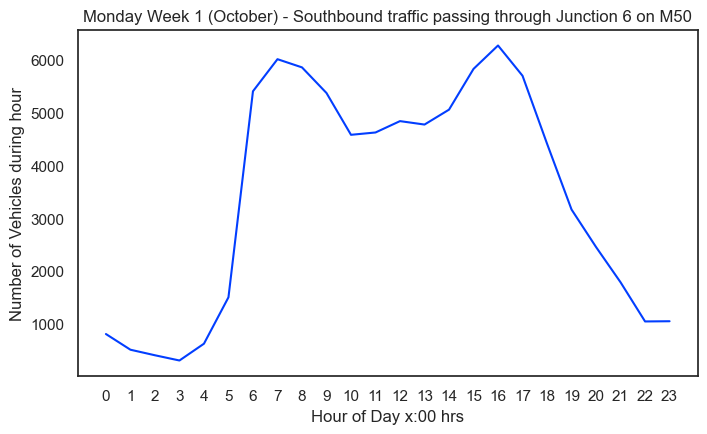

In [210]:
# Here I filtering my main dataframe to create a smaller dataframe, containing only the 24 rows where the day is Monday
# and the week is Week 1.
monday_wk1 = df.loc[(df['day'] == 'Mon') & (df['week'] == 1)]

plt.figure(figsize=(8, 4.5))
plt.plot(monday_wk1['hour'], monday_wk1['southbound'])
plt.xlabel('Hour of Day x:00 hrs')
plt.xticks(np.arange(24))      # separate x-axis into intervals of 1 hour rather than default interval of 5 hours
plt.ylabel('Number of Vehicles during hour')
plt.title('Monday Week 1 (October) - Southbound traffic passing through Junction 6 on M50')
plt.show()


The distribution appears as we might expect it to be for a Monday; the largest volumes of traffic occur between 6 and 9 am, and between 3 and 6 pm, when commuters are travelling to and from work and students are travelling to and from school.

To get a better sense of what Southbound traffic levels might be like on a typical Monday, we can create a plot of the average volume of traffic during each hour of Monday, calculated over the four Mondays of the sample dataset:

#### Average hourly Southbound traffic over each Monday ####

In [211]:
# First we create a dataframe consisting only of rows where the data in the 'day' column is 'Mon'.

monday = df.loc[df['day'] == 'Mon']

print(monday)

# Next we use the groupby() function on this 'monday' dataframe to seperate the data by the contents of the 'hour' column. 
# This creates 24 groups of data from the 'monday' dataframe, with each group having 4 rows corresponding to the 4 weeks sampled.
# We then use the .mean method on the 'southbound' column within each of these groups to calculate the mean value (over 4 weeks)
# for southbound traffic for each hour of each day.

# Note: The output of this function is a floating point variable. As the aim of this project is to simulate a dataset, rather than 
# produce true-to-reality plots of already existing datasets, I am content to not round these figure to whole numbers of vehicles 
# and instead leave the output of the mean() function as numerically accurate as possible for now.

mean_mon_s_hourly = monday.groupby('hour')['southbound'].mean()

print()
print('The average figure for southbound traffic passing through Junction 6 during each hour on a Monday is: ')
print(mean_mon_s_hourly)

     week  hour  day day_type  southbound  northbound  temp
0       1     0  Mon  weekday         812         461  10.2
1       1     1  Mon  weekday         515         266   9.8
2       1     2  Mon  weekday         410         283   9.5
3       1     3  Mon  weekday         311         546   9.4
4       1     4  Mon  weekday         629        1018   9.4
..    ...   ...  ...      ...         ...         ...   ...
523     4    19  Mon  weekday        3120        3266  10.9
524     4    20  Mon  weekday        2467        2094  10.9
525     4    21  Mon  weekday        1889        1475  11.0
526     4    22  Mon  weekday        1246        1066  11.2
527     4    23  Mon  weekday         842         753  10.9

[96 rows x 7 columns]

The average figure for southbound traffic passing through Junction 6 during each hour on a Monday is: 
hour
0      905.75
1      563.50
2      430.00
3      315.25
4      604.25
5     1558.75
6     5407.50
7     5915.75
8     5717.75
9     5250.50
10    46

Next, we can work out which hour of Monday has the highest average traffic level over the four weeks, and what that traffic level is. We can use the fact the indices of the output of mean_mon_s_hourly have the same numeric value as the hours which they relate to (eg. index [7] relates to the hour beginning at 7:00).

In [212]:
# here the idxmax() method allows us to pick out which row among the 24 rows of average hourly southbound traffic data
# has the highest figure, and the max() method tells us what that figure is

max_row_mon_s_hourly = mean_mon_s_hourly.idxmax()
max_value_mon_s_hourly = mean_mon_s_hourly.max()
print(f'The maximum average hourly figure for Southbound traffic on Mondays is {max_value_mon_s_hourly} and this occurs during the hour starting at {max_row_mon_s_hourly}:00')

The maximum average hourly figure for Southbound traffic on Mondays is 5915.75 and this occurs during the hour starting at 7:00


Next, we can plot this average hourly traffic for Southbound traffic measured over four consecutive Mondays in October:

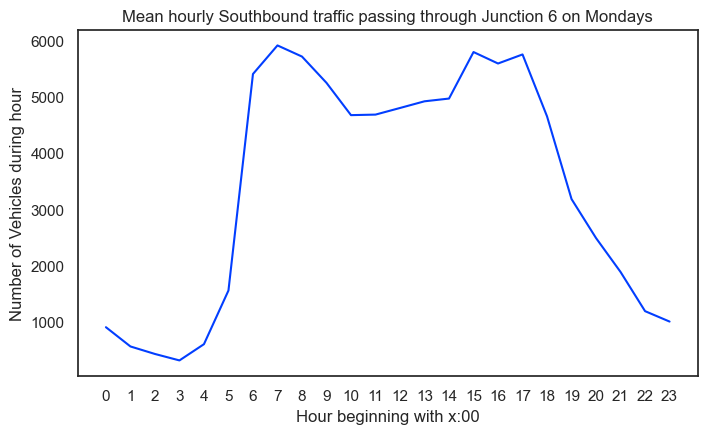

In [213]:
plt.figure(figsize=(8,4.5))   
plt.plot(mean_mon_s_hourly)
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))      # seperate x-axis into 24 intervals rather than 5
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly Southbound traffic passing through Junction 6 on Mondays')
plt.show()

#### Average hourly Northbound traffic over each Monday ####
Next, we can calculate the same kind of data for Northbound traffic over the four Mondays sampled for October:

In [214]:
mean_mon_n_hourly = monday.groupby('hour')['northbound'].mean()

print()
print('The average figure for Northbound traffic passing through Junction 6 during each hour on a Monday is: ')
print(mean_mon_n_hourly)

max_row_mon_n_hourly = mean_mon_n_hourly.idxmax()
max_value_mon_n_hourly = mean_mon_n_hourly.max()
print()
print()
print(f'The maximum average hourly figure for Northbound traffic on Mondays is {max_value_mon_n_hourly} and this occurs during the hour starting at {max_row_mon_n_hourly}:00.')


The average figure for Northbound traffic passing through Junction 6 during each hour on a Monday is: 
hour
0      479.50
1      279.25
2      281.75
3      545.25
4     1049.75
5     1592.75
6     3802.75
7     5749.50
8     5920.50
9     5293.00
10    4761.50
11    4703.75
12    4784.75
13    5042.00
14    5111.25
15    5979.25
16    6019.75
17    5959.00
18    5103.75
19    3293.50
20    2114.75
21    1495.50
22    1070.00
23     722.75
Name: northbound, dtype: float64


The maximum average hourly figure for Northbound traffic on Mondays is 6019.75 and this occurs during the hour starting at 16:00.


I will now create a plot of the average hourly Northbound traffic for Mondays, laying it over the plot for average hourly Southbound traffic to allow for an easier comparison:

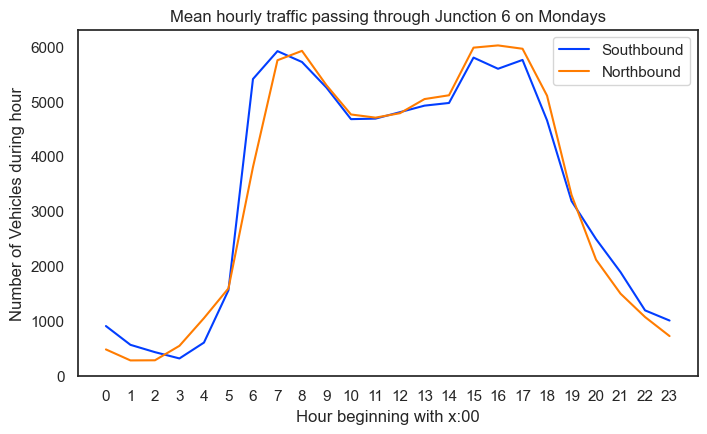

In [215]:
plt.figure(figsize=(8,4.5))
plt.plot(mean_mon_s_hourly, label = 'Southbound')
plt.plot(mean_mon_n_hourly, label = 'Northbound')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Mondays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()

This graph gives us a sense of which hours are the busiest and least busy on a Monday, and also show how similar traffic levels are in each direction during any given hour. 

#### Average hourly Southbound and Northbound traffic for other weekdays ####
To get a sense of how average traffic levels look for each other **weekday** we can plot similar graphs as the one above:

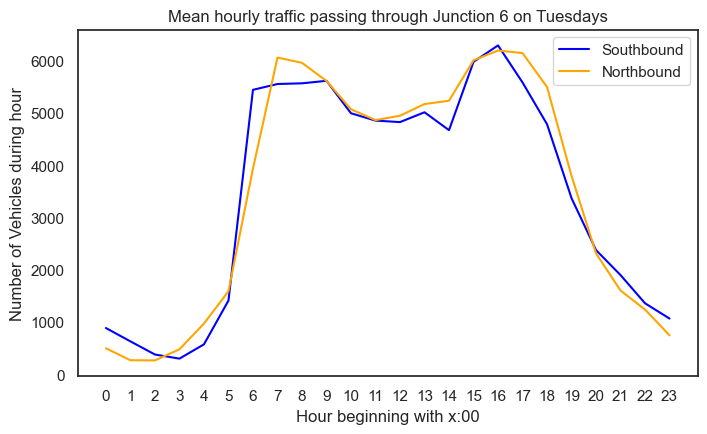

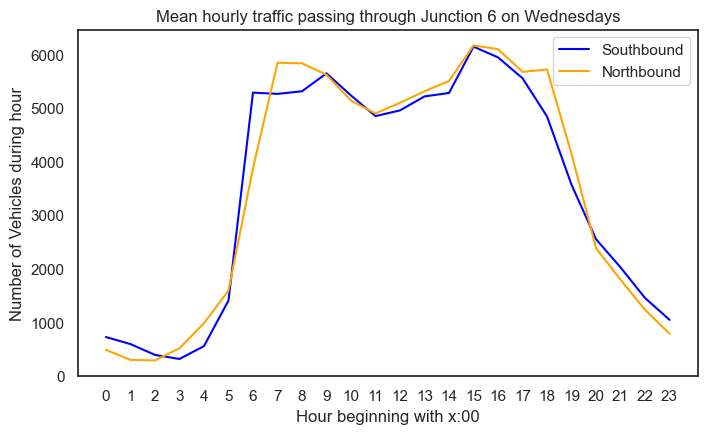

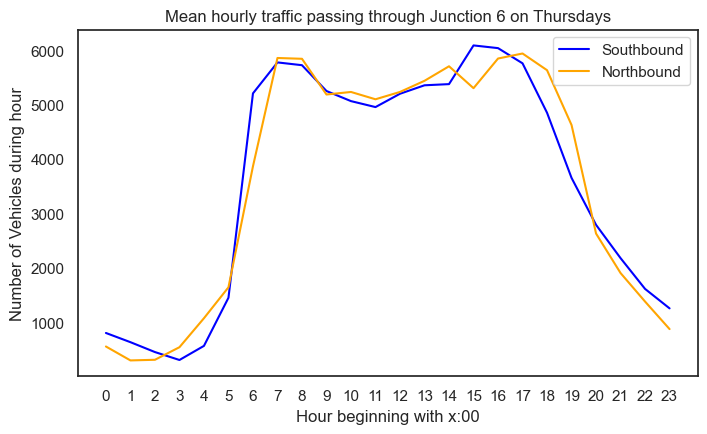

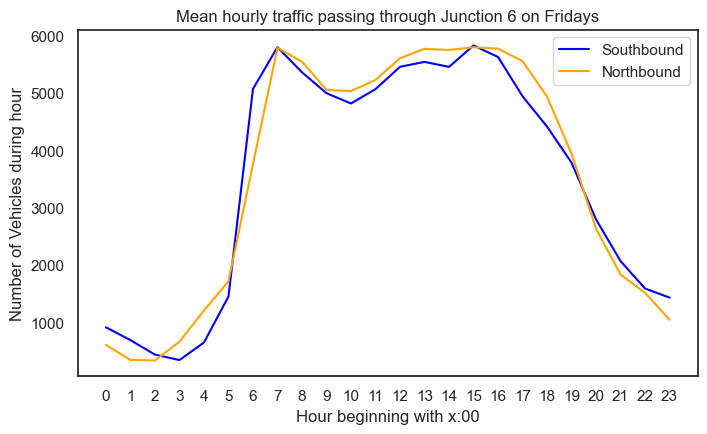

In [216]:
tuesday = df.loc[df['day'] == 'Tues']
wednesday = df.loc[df['day'] == 'Wed']
thursday = df.loc[df['day'] == 'Thurs']
friday = df.loc[df['day'] == 'Fri']

mean_tues_s_hourly = tuesday.groupby('hour')['southbound'].mean()
mean_wed_s_hourly = wednesday.groupby('hour')['southbound'].mean()
mean_thurs_s_hourly = thursday.groupby('hour')['southbound'].mean()
mean_fri_s_hourly = friday.groupby('hour')['southbound'].mean()

mean_tues_n_hourly = tuesday.groupby('hour')['northbound'].mean()
mean_wed_n_hourly = wednesday.groupby('hour')['northbound'].mean()
mean_thurs_n_hourly = thursday.groupby('hour')['northbound'].mean()
mean_fri_n_hourly = friday.groupby('hour')['northbound'].mean()


plt.figure(figsize=(8,4.5))
plt.plot(mean_tues_s_hourly, label = 'Southbound', color = 'blue')
plt.plot(mean_tues_n_hourly, label = 'Northbound', color = 'orange')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))      
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Tuesdays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()

plt.figure(figsize=(8,4.5))
plt.plot(mean_wed_s_hourly, label = 'Southbound', color = 'blue')
plt.plot(mean_wed_n_hourly, label = 'Northbound', color = 'orange')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Wednesdays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()

plt.figure(figsize=(8,4.5))
plt.plot(mean_thurs_s_hourly, label = 'Southbound', color = 'blue')
plt.plot(mean_thurs_n_hourly, label = 'Northbound', color = 'orange')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))    
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Thursdays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()

plt.figure(figsize=(8,4.5))
plt.plot(mean_fri_s_hourly, label = 'Southbound', color = 'blue')
plt.plot(mean_fri_n_hourly, label = 'Northbound', color = 'orange')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))    
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Fridays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()



#### Average hourly Southbound and Northbound traffic for weekends ####
The distributions of hourly traffic for the two **weekend** days are as below:

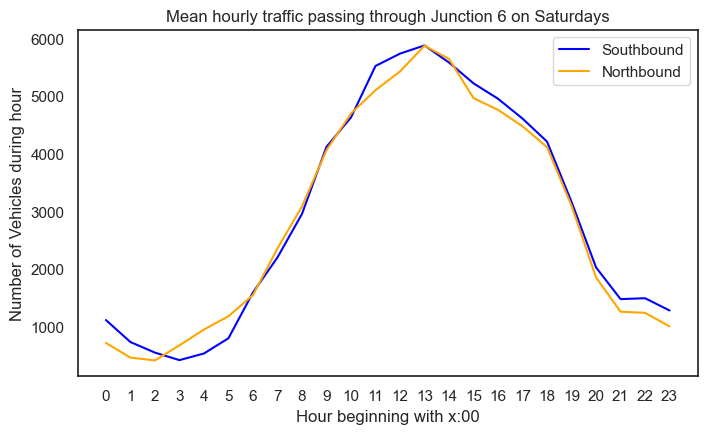

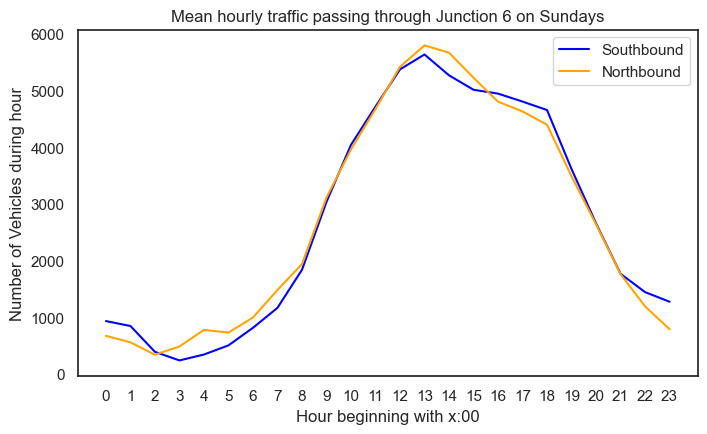

In [217]:
saturday = df.loc[df['day'] == 'Sat']
sunday = df.loc[df['day'] == 'Sun']

mean_sat_s_hourly = saturday.groupby('hour')['southbound'].mean()
mean_sun_s_hourly = sunday.groupby('hour')['southbound'].mean()

mean_sat_n_hourly = saturday.groupby('hour')['northbound'].mean()
mean_sun_n_hourly = sunday.groupby('hour')['northbound'].mean()


plt.figure(figsize=(8,4.5))
plt.plot(mean_sat_s_hourly, label = 'Southbound', color = 'blue')
plt.plot(mean_sat_n_hourly, label = 'Northbound', color = 'orange')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Saturdays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()

plt.figure(figsize=(8,4.5))
plt.plot(mean_sun_s_hourly, label = 'Southbound', color = 'blue')
plt.plot(mean_sun_n_hourly, label = 'Northbound', color = 'orange')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Sundays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()

#### Average busiest times and traffic volumes by day and direction ####
As we did above for Monday's hourly data, we can get a sense of which hour is the busiest on average for each other day using the .max and .idxmax methods on the mean hourly data:

In [218]:
max_row_tues_s_hourly = mean_tues_s_hourly.idxmax()
max_value_tues_s_hourly = mean_tues_s_hourly.max()

max_row_tues_n_hourly = mean_tues_n_hourly.idxmax()
max_value_tues_n_hourly = mean_tues_n_hourly.max()

max_row_wed_s_hourly = mean_wed_s_hourly.idxmax()
max_value_wed_s_hourly = mean_wed_s_hourly.max()

max_row_wed_n_hourly = mean_wed_n_hourly.idxmax()
max_value_wed_n_hourly = mean_wed_n_hourly.max()

max_row_thurs_s_hourly = mean_thurs_s_hourly.idxmax()
max_value_thurs_s_hourly = mean_thurs_s_hourly.max()

max_row_thurs_n_hourly = mean_thurs_n_hourly.idxmax()
max_value_thurs_n_hourly = mean_thurs_n_hourly.max()

max_row_fri_s_hourly = mean_fri_s_hourly.idxmax()
max_value_fri_s_hourly = mean_fri_s_hourly.max()

max_row_fri_n_hourly = mean_fri_n_hourly.idxmax()
max_value_fri_n_hourly = mean_fri_n_hourly.max()

max_row_sat_s_hourly = mean_sat_s_hourly.idxmax()
max_value_sat_s_hourly = mean_sat_s_hourly.max()

max_row_sat_n_hourly = mean_sat_n_hourly.idxmax()
max_value_sat_n_hourly = mean_sat_n_hourly.max()

max_row_sun_s_hourly = mean_sun_s_hourly.idxmax()
max_value_sun_s_hourly = mean_sun_s_hourly.max()

max_row_sun_n_hourly = mean_sun_n_hourly.idxmax()
max_value_sun_n_hourly = mean_sun_n_hourly.max()

print(f'The maximum average hourly figure for Southbound traffic for each day and the hour this is expected to occur are as below:')
print(f'Tuesday:   {max_value_tues_s_hourly} at  {max_row_tues_s_hourly}:00')
print(f'Wednesday: {max_value_wed_s_hourly} at  {max_row_wed_s_hourly}:00')
print(f'Thursday:  {max_value_thurs_s_hourly} at  {max_row_thurs_s_hourly}:00')
print(f'Friday:    {max_value_fri_s_hourly}  at  {max_row_fri_s_hourly}:00')
print(f'Saturday:  {max_value_sat_s_hourly} at  {max_row_sat_s_hourly}:00')
print(f'Sunday:    {max_value_sun_s_hourly}  at  {max_row_sun_s_hourly}:00')

print()

print(f'The maximum average hourly figure for Northbound traffic for each day and the hour this is expected to occur are as below:')
print(f'Tuesday:   {max_value_tues_n_hourly}  at  {max_row_tues_n_hourly}:00')
print(f'Wednesday: {max_value_wed_n_hourly} at  {max_row_wed_n_hourly}:00')
print(f'Thursday:  {max_value_thurs_n_hourly} at  {max_row_thurs_n_hourly}:00')
print(f'Friday:    {max_value_fri_n_hourly} at  {max_row_fri_n_hourly}:00')
print(f'Saturday:  {max_value_sat_n_hourly}  at  {max_row_sat_n_hourly}:00')
print(f'Sunday:    {max_value_sun_n_hourly}  at  {max_row_sun_n_hourly}:00')


The maximum average hourly figure for Southbound traffic for each day and the hour this is expected to occur are as below:
Tuesday:   6293.75 at  16:00
Wednesday: 6143.25 at  15:00
Thursday:  6092.75 at  15:00
Friday:    5832.5  at  15:00
Saturday:  5881.75 at  13:00
Sunday:    5639.0  at  13:00

The maximum average hourly figure for Northbound traffic for each day and the hour this is expected to occur are as below:
Tuesday:   6196.5  at  16:00
Wednesday: 6165.75 at  15:00
Thursday:  5944.25 at  17:00
Friday:    5800.75 at  15:00
Saturday:  5877.5  at  13:00
Sunday:    5799.0  at  13:00


#### Standard deviations of hourly traffic data ####

We can calculate the extent to which traffic data varied for each hour of the week, measured relative to the mean figures for each hour of the week. This generates floating point numbers which I will not round up, as I want the figures for standard deviation to be as accurate as possible when using them to simulate my dataset further on. To begin, I will calculate the standard deviations for Monday's hourly Southbound traffic.

In [219]:
std_mon_s_hourly = monday.groupby('hour')['southbound'].std()
print(std_mon_s_hourly)

hour
0       71.121375
1       53.319790
2       34.756294
3       15.585784
4       25.184321
5       51.292462
6       39.110953
7       92.791433
8      229.039116
9      298.221953
10     192.144694
11      83.969737
12      80.967071
13     113.485315
14      79.086451
15      40.816663
16    1099.581852
17     304.169224
18     446.802995
19      60.785826
20      32.263240
21      79.629873
22      97.984267
23     109.462322
Name: southbound, dtype: float64


Similar statistics for standard deviation can be calculated for hourly Southbound and Northbound traffic for each of the seven days of the week, over the four weeks studied; the code for calculating these (without printing) is as below:

In [220]:
std_tues_s_hourly = tuesday.groupby('hour')['southbound'].std()
std_wed_s_hourly = wednesday.groupby('hour')['southbound'].std()
std_thurs_s_hourly = thursday.groupby('hour')['southbound'].std()
std_fri_s_hourly = friday.groupby('hour')['southbound'].std()
std_sat_s_hourly = saturday.groupby('hour')['southbound'].std()
std_sun_s_hourly = sunday.groupby('hour')['southbound'].std()

std_mon_n_hourly = monday.groupby('hour')['northbound'].std()
std_tues_n_hourly = tuesday.groupby('hour')['northbound'].std()
std_wed_n_hourly = wednesday.groupby('hour')['northbound'].std()
std_thurs_n_hourly = thursday.groupby('hour')['northbound'].std()
std_fri_n_hourly = friday.groupby('hour')['northbound'].std()
std_sat_n_hourly = saturday.groupby('hour')['northbound'].std()
std_sun_n_hourly = sunday.groupby('hour')['northbound'].std()

#### Summary of traffic distribution ####
We can see that at the broadest level of description, traffic in both directions during all five weekdays follows a roughly similar distribution: a first peak period between 6 am and 10 am, followed by a second peak period between 2 pm and 7 pm. 

Bearing in mind that the hours with the busiest traffic levels for Monday are 7:00 for Southbound (level is 5915.75 ) and 16:00 for Northbound (level is 6019.75), we can see that, in general:
- on weekdays, traffic levels peak between 3 and 5 pm, and peak traffic levels are slightly higher earlier in the week than later.
- on weekends, traffic levels peak at slightly lower levels than during the working week.

On Mondays, the busiest hour is between 7 and 8 am; perhaps this can be explained by additional people travelling back to Dublin for work and college on a Monday morning after having spent the weekend further away.

For weekends, we find a very different distribution than that found for weekdays; traffic on both days peaks during the hour of 13:00, which resonates with my past experiences of travelling to Blanchardstown shopping centre at this time. However, on Sunday evening we see a steadier fall off in the second half of the day; my guess is that this is due to people returning to their accomodation in Dublin following the weekend spent down the country etc.

When I create my simulated dataset later based on this dataset, we can check for the presence of these features there too.

### Distribution of Air Temperature data ###

#### All temperature data ####
We can create a plot of all temperature data; unfortunately, I haven't found a way to prevent the plot returning to zero and bringing 27 straight lines across the plot - see below. If we ignore these lines, however, we can see the general rise-and-fall pattern of temperatures on a daily basis.

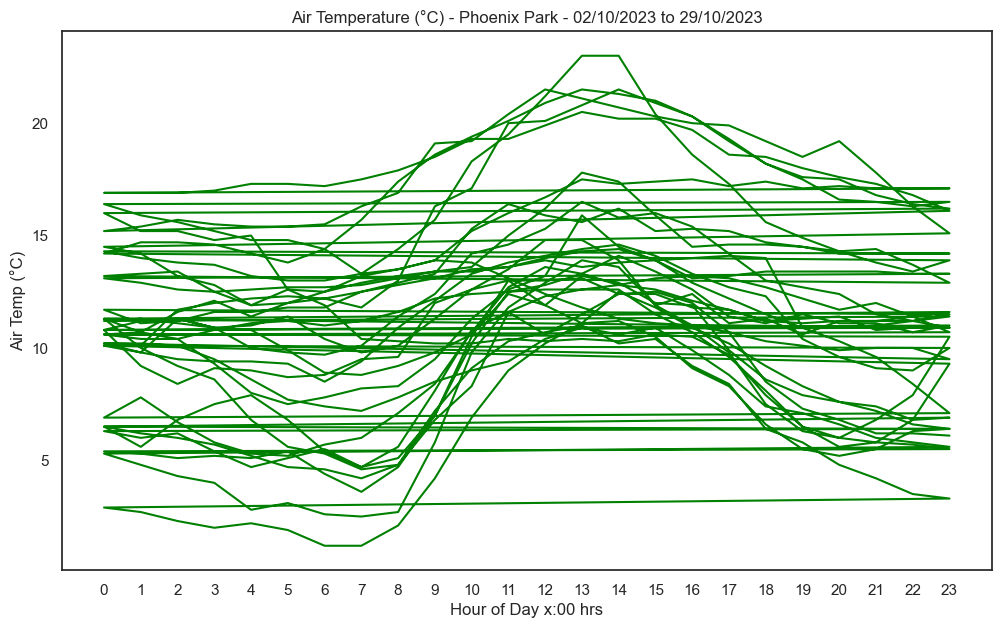

In [221]:
plt.figure(figsize=(12, 7))
plt.plot(df['hour'], df['temp'], color = 'green')
plt.xlabel('Hour of Day x:00 hrs')
plt.xticks(np.arange(24))
plt.ylabel('Air Temp (°C)')
plt.title('Air Temperature (°C) - Phoenix Park - 02/10/2023 to 29/10/2023')
plt.show()


#### Temperature variation over 24 hours - examples of individual days ####
To create some cleaner plots, we can plot air temperature for Monday of Week 2, Wednesday of Week 3 and Saturday of Week 4; this gives us a sense of what somewhat randomly selected daily air temperature data can look like. I have plotted the data on separate graphs as I found it difficult to create a y-axis to capture the full temperature range.

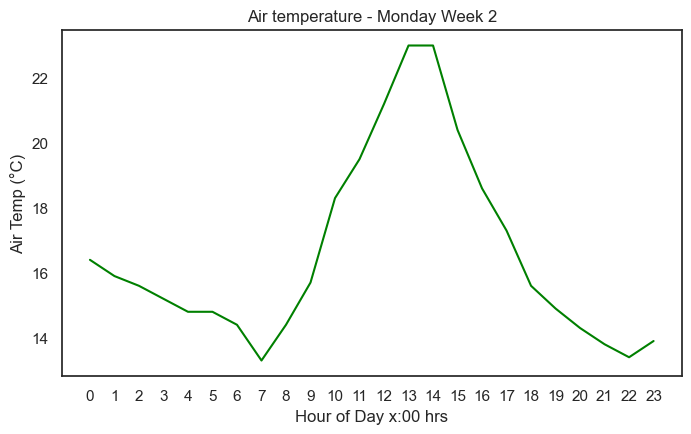

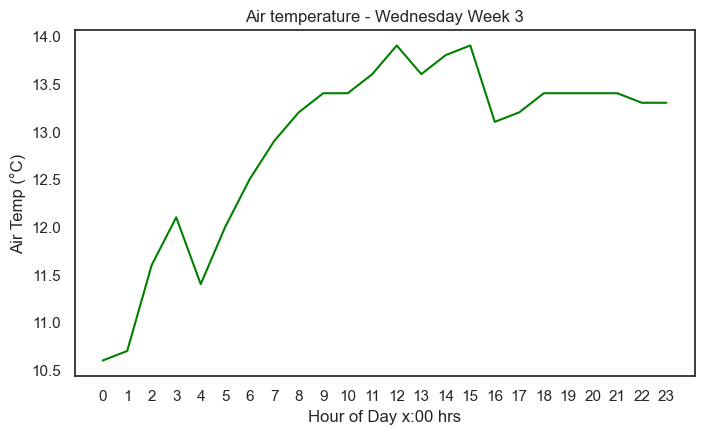

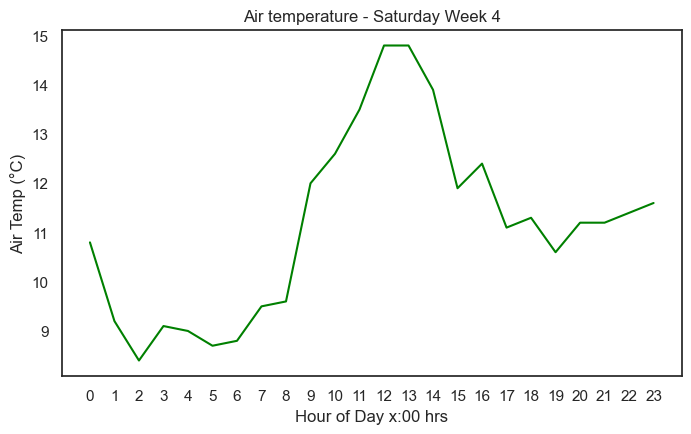

In [222]:
monday_wk2 = df.loc[(df['day'] == 'Mon') & (df['week'] == 2)]
wednesday_wk3 = df.loc[(df['day'] == 'Wed') & (df['week'] == 3)]
saturday_wk4 = df.loc[(df['day'] == 'Sat') & (df['week'] == 4)]

plt.figure(figsize=(8, 4.5))
plt.plot(monday_wk2['hour'], monday_wk2['temp'], label = "Mon week 2 temp", color = 'green')
plt.xlabel('Hour of Day x:00 hrs')
plt.xticks(np.arange(24))
plt.ylabel('Air Temp (°C)')
plt.title('Air temperature - Monday Week 2')
plt.show()

plt.figure(figsize=(8, 4.5))
plt.plot(wednesday_wk3['hour'], wednesday_wk3['temp'], label = "Wed week 3 temp", color = 'green')
plt.xlabel('Hour of Day x:00 hrs')
plt.xticks(np.arange(24))
plt.ylabel('Air Temp (°C)')
plt.title('Air temperature - Wednesday Week 3')
plt.show()

plt.figure(figsize=(8, 4.5))
plt.plot(saturday_wk4['hour'], saturday_wk4['temp'], label = "Sat week 2 temp", color = 'green')
plt.xlabel('Hour of Day x:00 hrs')
plt.xticks(np.arange(24))
plt.ylabel('Air Temp (°C)')
plt.title('Air temperature - Saturday Week 4')
plt.show()


#### Average temperature for each hour over 4 week sample period ####
It seems reasonable to me to assume that the air-temperature during a given hour of the day should be uncorrelated with the name of day, since day names are social construct created by human beings and don't have innate characteristic links to the weather, in and of themselves. Whatever the case may be with a short term sample such as the one I am analysing (where correlations could be found which are coincidental), over the long run, the incidence of certain air temperature levels during certain hours of the day should even out across the seven days of the week as so as to be uncorrelated with them. Therefore, I will not analyse temperature with regard to day of the week.

A more interesting investigation might be to analyse what the average air temperature is during each hour of the day during a certain month of the year. Here, I will calculate the average air temperature for each hour over the 4 week sample of October 2023 and then plot this data; I will use the groupby function again to do this:



In [223]:
mean_hrly_temp = df.groupby('hour')['temp'].mean()

print(mean_hrly_temp)

hour
0     10.803571
1     10.550000
2     10.525000
3     10.332143
4      9.978571
5      9.771429
6      9.553571
7      9.567857
8     10.167857
9     11.489286
10    12.878571
11    13.989286
12    14.403571
13    14.896429
14    14.796429
15    14.275000
16    13.685714
17    12.957143
18    12.092857
19    11.389286
20    11.078571
21    10.846429
22    10.660714
23    10.710714
Name: temp, dtype: float64


This list of average air temperatures can be plotted:

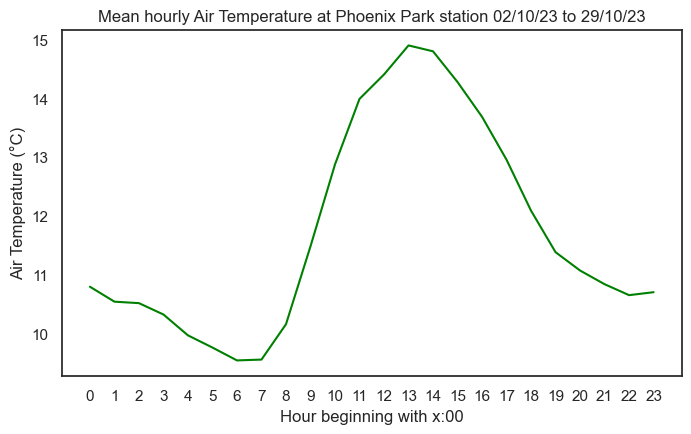

In [224]:
plt.figure(figsize=(8,4.5))
plt.plot(mean_hrly_temp, color = 'green')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Air Temperature (°C)')
plt.title('Mean hourly Air Temperature at Phoenix Park station 02/10/23 to 29/10/23')
plt.show()

#### Summary of Air Temperature data distribution ####
We can see that during the four weeks sampled during October 2023, air temperature could be expected to reach its lowest values around 6 to 7 am and rise to its peak around miday, before dropping gradually down to it's lowest point again. Air temperature can therefore be seen to have a pattern which occurs in a regular pattern, and can be modelled using sinusoidal waves.

We can also quickly generate some summary statistics for air temperature, which we can compare later to our simulated dataset.

In [225]:
temp_stats = df['temp'].describe()

print(temp_stats)

count    672.000000
mean      11.725000
std        4.137798
min        1.200000
25%        9.375000
50%       11.700000
75%       14.200000
max       23.000000
Name: temp, dtype: float64


#### Standard deviations of hourly air temperature data ####

We can calculate the extent to which air temperature varied for each hour of the day, measured relative to the mean figures for each hour over the 4-week period. This generates floating point numbers which I will not round up, as I want the figures for standard deviation to be as accurate as possible when using them to simulate my dataset further on.

In [236]:
std_temp_hourly = df.groupby('hour')['temp'].std()
print(std_temp_hourly)

hour
0     3.656702
1     3.694290
2     3.744094
3     3.780658
4     3.927242
5     3.949201
6     4.096112
7     4.353037
8     4.374002
9     3.990483
10    3.436122
11    3.259895
12    3.471949
13    3.649706
14    3.630476
15    3.447342
16    3.451002
17    3.523301
18    3.876609
19    4.042399
20    4.208401
21    4.097739
22    3.918649
23    3.785189
Name: temp, dtype: float64


### Correlation and Regression analysis ###

#### Correlations between Southbound and Northbound traffic ####
We can get a picture of just how highly correlated southbound and northbound traffic volums are by using the np.corrcoef function. This measures hte Pearson's correlation coefficient. This is a measure of the linear relationship between two features. It’s the ratio of the covariance of x and y to the product of their standard deviations. 

 Here we find an almost perfect correlation of r = 0.978 ie. whatever the volume of traffic is going in one direction during a certain time, there tends to be a similar volume of traffic at the same time going in the other direction.

In [226]:
# Here I used [0,1] to print only the entry in the top right corner of the correlation matrix.
# I have also rounded the printed output to three decimal places for greater clarity.

corr_s_n = np.corrcoef(df['southbound'], df['northbound'])[0,1]
print(f'The Pearson correlation coefficient between Southbound and Northbound traffic is {round(corr_s_n, 3)}.')

The Pearson correlation coefficient between Southbound and Northbound traffic is 0.978.


We can create a scatterplot using Seaborn to illustrate the strong correlation of Southbound and Northbound traffic:

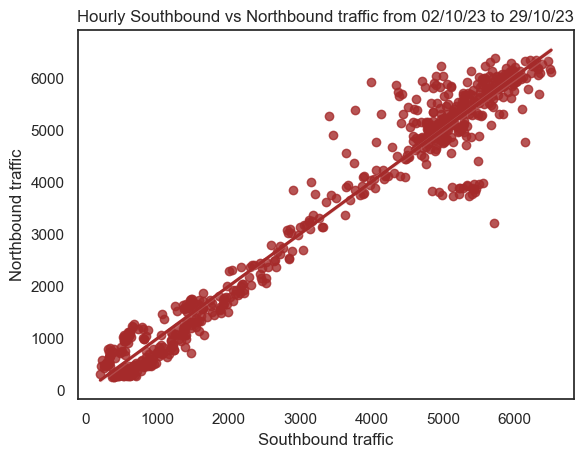

In [227]:
sns.regplot(x='southbound', y='northbound', data = df, color = 'brown')

plt.xlabel('Southbound traffic')
plt.ylabel('Northbound traffic')
plt.title('Hourly Southbound vs Northbound traffic from 02/10/23 to 29/10/23')

# Show the plot
plt.show()


#### Correlations between traffic levels and Air Temperature ####

I was curious to test what relationship might exist between the weather and traffic levels. To test this, I obtained hourly weather information for the nearby Phoenix Park weather station for the month of October. 

I had initially hoped to test the relationship of rain levels to traffic, as I know from experience that driving on the m50 in heavy rainy is something that I would avoid if possible. However, I found that  most hours did not have any rainfall associated with them, and this meant it would be harder to draw a conclusion about the impact of rainfall on traffic levels. Instead, I decided to test the correlation between temperature levels (in degrees Celsisus) and traffic levels. 

In [228]:
corr_s_temp = np.corrcoef(df['southbound'], df['temp'])[0,1]

corr_n_temp = np.corrcoef(df['northbound'], df['temp'])[0,1]

print(round(corr_s_temp, 3))
print(round(corr_n_temp, 3))

0.336
0.34


Here we find a weak positive correlation between local air temperature and road traffic levels of around 0.34 for both directions. While correlation does not imply causation, it is conceivable to me that, all else being equal, when the weather is more pleasant (in an October context, this might mean less cold than usual), people might be more inclined to leave the house and use the M50, especially on a weekend day when fewer people need to drive to work and the decision to drive is optional.

We can also plot scatterplots of air temperature against southbound and northbound traffic:

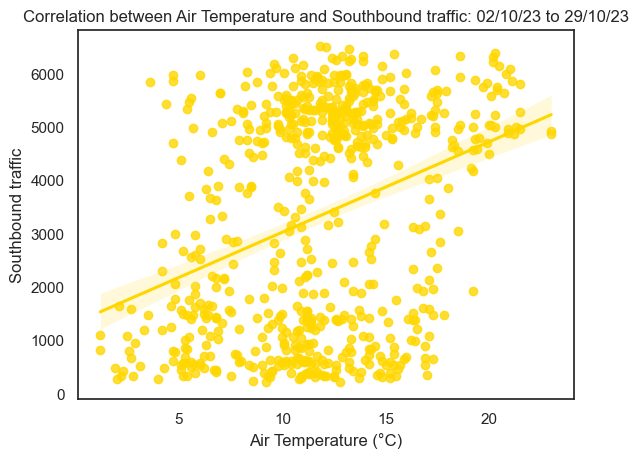

In [229]:
sns.set_theme(style = "white")
sns.set_palette("bright") 

sns.regplot(x='temp', y='southbound', data = df, color = 'gold')

plt.xlabel('Air Temperature (°C)')
plt.ylabel('Southbound traffic')
plt.title('Correlation between Air Temperature and Southbound traffic: 02/10/23 to 29/10/23')

# Show the plot
plt.show()

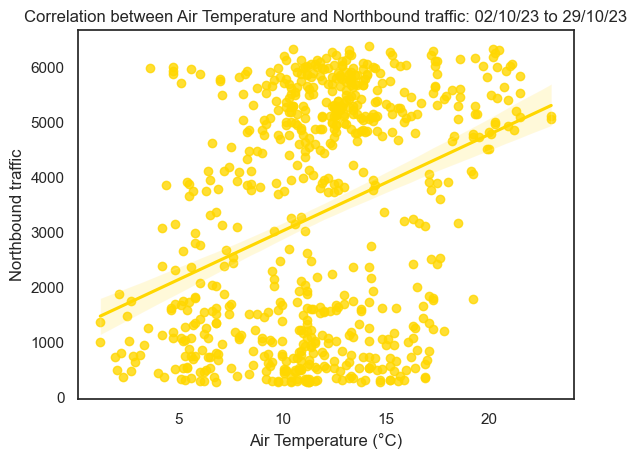

In [230]:
sns.regplot(x='temp', y='northbound', data = df, color = 'gold')

plt.xlabel('Air Temperature (°C)')
plt.ylabel('Northbound traffic')
plt.title('Correlation between Air Temperature and Northbound traffic: 02/10/23 to 29/10/23')

# Show the plot
plt.show()


#### Regression equation ####
The **regression equation** for the line can be created using scipy.stats and the linregress function:

In [231]:
reg_temp_s = ss.linregress(df['temp'], df['southbound']) 

reg_temp_n = ss.linregress(df['temp'], df['northbound']) 

print(reg_temp_s)
print(reg_temp_n)

#model_temp_s = LinearRegression()

#x = df['temp'].values.reshape((-1, 1))
#y = df['southbound']

#model_temp_s.fit(x, y)


LinregressResult(slope=169.75979767488016, intercept=1325.6645865477444, rvalue=0.3363766699193965, pvalue=3.0684322257273363e-19, stderr=18.361021797109604, intercept_stderr=228.27669804614854)
LinregressResult(slope=176.21163317212788, intercept=1249.9498510568005, rvalue=0.34007356244694875, pvalue=1.1788388919137938e-19, stderr=18.825060791911735, intercept_stderr=234.04594611243863)


The general form of a regression equation is y = mx + c, where m is the slope and x is the intercept of the regression line with the y-axis.

In this case, the regression equation predicting the number of vehicles travelling southbound, y, given the temperature in degrees celsisus, x, is approximately:

    y = 169.76x + 1352.66 

The equation to predict the number of cars travelling northbound, given the temperature, is:

    y = 176.21x + 1249.95

#### Side-by-side comparison of distributions ####
To examine the relationships between 'temp' and 'southbound' variables for a sample day (Monday Week 1), we can create a plot with two y-axes:

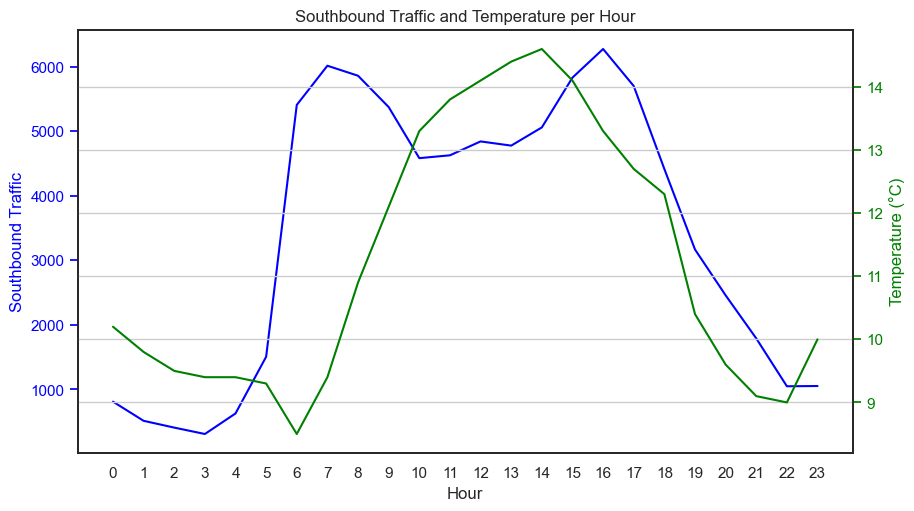

In [232]:
# this creates a plot capable of displaying more than one subplot
# https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/#:~:text=It%20uses%20ax.,Y%20axis%20on%20this%20twin.

fig, ax1 = plt.subplots(figsize=(10, 5.5))

# This creates a second y-axis which shares the same x-axis as the first y-axis
ax2 = ax1.twinx()

# Plot for southbound traffic on the primary y-axis
ax1.plot(monday_wk1['hour'], monday_wk1['southbound'], color='blue', label='Southbound Mon Wk 1')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Southbound Traffic', color='blue')
ax1.tick_params(axis='y', colors='blue')   

# Plot for temperature on secondary y-axis
ax2.plot(monday_wk1['hour'], monday_wk1['temp'], color='green', label='Temperature Mon Wk 1')
ax2.set_ylabel('Temperature (°C)', color='green')
ax2.tick_params(axis='y', colors='green')

plt.title('Southbound Traffic and Temperature per Hour')
plt.xticks(np.arange(24))   
plt.grid(True)    # This plots a grid which makes it easier to compare both sets of data
plt.show()

### Synthesising datasets ###

To create a synthetic dataset of weekly traffic data, I will use the mean and standard deviations for the hourly Southbound and Northbound data obtained above and use np.random to create a plausable set of datapoints for each day and hour.

I will then compare the distributions and properties of the synthetic dataset to the distributions obtained for the real data from Week 1 to Week 4.

I will first create synthetic hourly data for Monday Southbound traffic: to do this, I will generate a list of twenty-four normally distributed random numbers, each representing synthetic data for each hour. 

In [234]:
synth_mon_s_hourly = np.random.normal(loc=mean_mon_s_hourly, scale=std_mon_s_hourly, size=24)

# print(synthetic_mon_s_hourly)

df_synth_mon_s_hourly = pd.DataFrame({'hour': range(24), 'southbound': synth_mon_s_hourly, 'day': 'Mon'})

#noisy_df_synth_mon_s_hourly = pd.DataFrame({'hour': range(24), 'southbound': synth_mon_s_hourly**, 'day': 'Mon'})

# print(df_synth_mon_s_hourly)

# now can add noise to this dataframe

# noise = 5 
# df_synth_mon_s_hourly['southbound_with_noise'] = df_synth_mon_s_hourly['southbound'] + np.random.normal(loc=0, scale=noise, size=24)

#print(noisy_df_synth_mon_s_hourly)



Next, I will plot this synthetic ("Week 5") data alongside the actual Southbound hourly traffic data for Week 1 to see how the distributions compare:

NameError: name 'noisy_df_synth_mon_s_hourly' is not defined

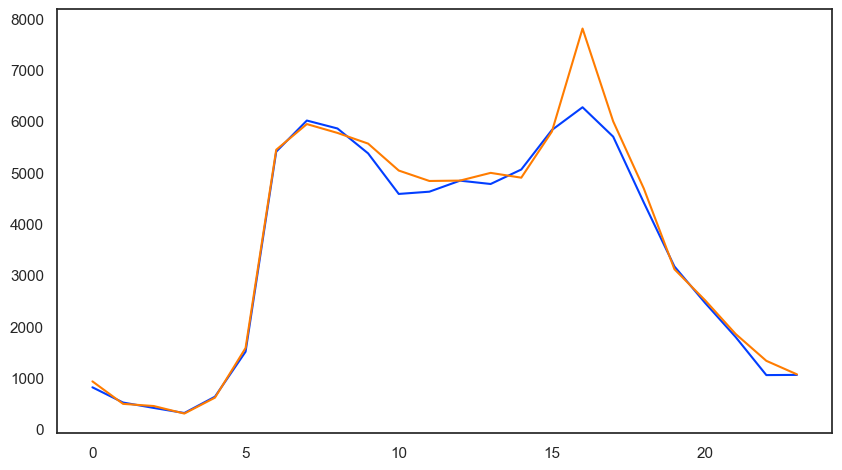

In [235]:
plt.figure(figsize=(10,5.5))
plt.plot(monday_wk1['hour'], monday_wk1['southbound'], label = 'Week 1 Southbound')
plt.plot(df_synth_mon_s_hourly['hour'], df_synth_mon_s_hourly['southbound'], label = 'Synthetic (Week 5) Southbound')
plt.plot(noisy_df_synth_mon_s_hourly['hour'], noisy_df_synth_mon_s_hourly['southbound'], label = 'Synthetic with added noise')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Mondays')
plt.legend(["Week 1", "Synthetic", "Noisy Synhtetic"], loc ="upper right")
plt.show()

We can see that the synthetic data matches the actual data for Week 1 very closely, except at the hour of 4 pm, which seems to be caused by the large figure for standard deviation for that hour on Mondays (and this in turn was caused by a much lower volume of traffic at that hour during Week 3 compared with the other three weeks)

### Summary ###


### References ###

1.	(author/s unknown) (n.d) *Tabular Calendar*. Trafficdata.tii.ie. Retrieved 19th November 2023 from https://trafficdata.tii.ie/calendar_alt.asp?sgid=XZOA8M4LR27P0HAO3_SRSB&spid=130DE8EB2080 

2.	(author/s unknown) (n.d) *Phoenix Park Hourly Data*. Data.gov.ie. Retrieved 19th November 2023 from https://data.gov.ie/dataset/phoenix-park-hourly-data

3.	(“unutbu”) 26th September 2012. *Changing the tick frequency on the x or y axis*. Stackoverflow.com. Retrieved 2nd December 2023 from https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-the-x-or-y-axis

4.	(author/s unknown) (n.d) *Group by: split-apply-combine*. Pandas.pydata.org. Retrieved 2nd December 2023 from https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#splitting-an-object-into-groups

5.	(author/s unknown) (n.d) *Pandas DataFrame idxmax() Method*. w3schools.com. Retrieved 2nd December 2023 from https://www.w3schools.com/python/pandas/ref_df_idxmax.asp

6.	(“shardul_singh_tomar”) 12th April 2020. *Matplotlib.pyplot.legend() in Python* Geeksforgeeks.com. Retrieved 2nd December 2023 from https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/

7.	*numpy.random.normal*. Numpy.org. Retrieved 2nd December 2023 from https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

8.	(Mirko Stojiljković) n/d. *Example: NumPy Correlation Calculation*. Realpython.com. Retrieved 2nd December 2023 from https://realpython.com/numpy-scipy-pandas-correlation-python/#example-numpy-correlation-calculation

9.	(“jonchar”) 8th December 2015. *Why do many examples use `fig, ax = plt.subplots()`*. Stackoverflow.com. Retrieved 2nd December 2023 from https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots

10.	(Yan Holtz) n/d. *Dual Y axis with Python and Matplotlib*. Python-graph-gallery.com. Retrieved 2nd December 2023 from https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/#:~:text=It%20uses%20ax.,Y%20axis%20on%20this%20twin
